In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure Visualization Defaults
%matplotlib inline
pylab.rcParams['figure.figsize'] = 12,8

In [2]:
train = pd.read_csv('data/training_set_VU_DM.csv',nrows=1000)

In [3]:
train.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   srch_id                      1000 non-null   int64  
 1   date_time                    1000 non-null   object 
 2   site_id                      1000 non-null   int64  
 3   visitor_location_country_id  1000 non-null   int64  
 4   visitor_hist_starrating      64 non-null     float64
 5   visitor_hist_adr_usd         64 non-null     float64
 6   prop_country_id              1000 non-null   int64  
 7   prop_id                      1000 non-null   int64  
 8   prop_starrating              1000 non-null   int64  
 9   prop_review_score            999 non-null    float64
 10  prop_brand_bool              1000 non-null   int64  
 11  prop_location_score1         1000 non-null   float64
 12  prop_location_score2         757 non-null    float64
 13  prop_log_historical

In [4]:
# Correlation heatmap of dataset
def correlation_heatmap(df):
    sns.set(font_scale=1)
    fig = plt.figure()
    _ , ax = plt.subplots(figsize =(10, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True,
        cbar=False,
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':10 }
    )
    _.figure.tight_layout()

Text(0.5, 1, 'Target')

<Figure size 864x576 with 0 Axes>

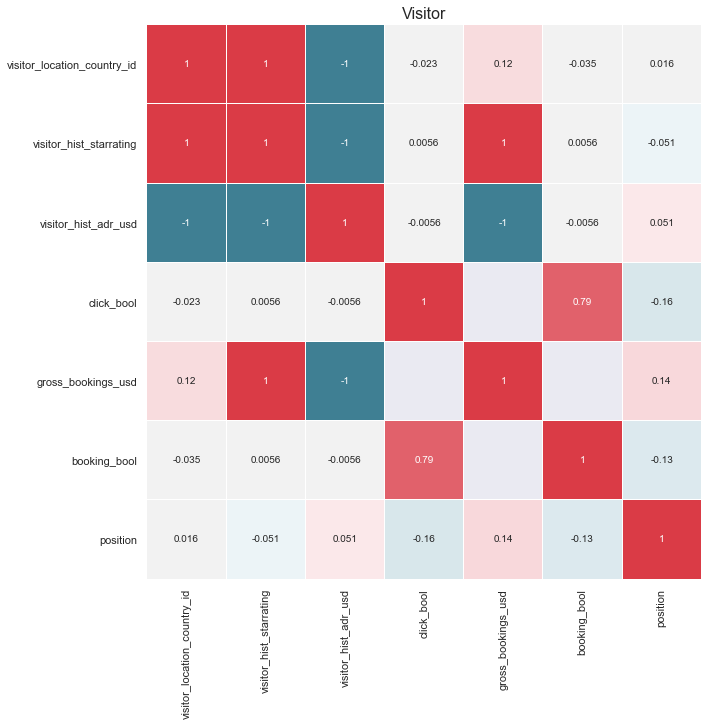

<Figure size 864x576 with 0 Axes>

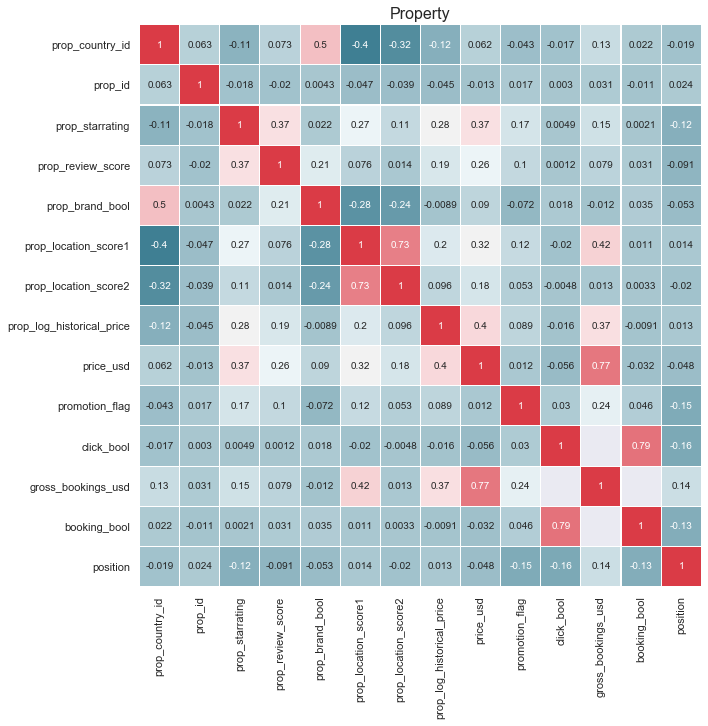

<Figure size 864x576 with 0 Axes>

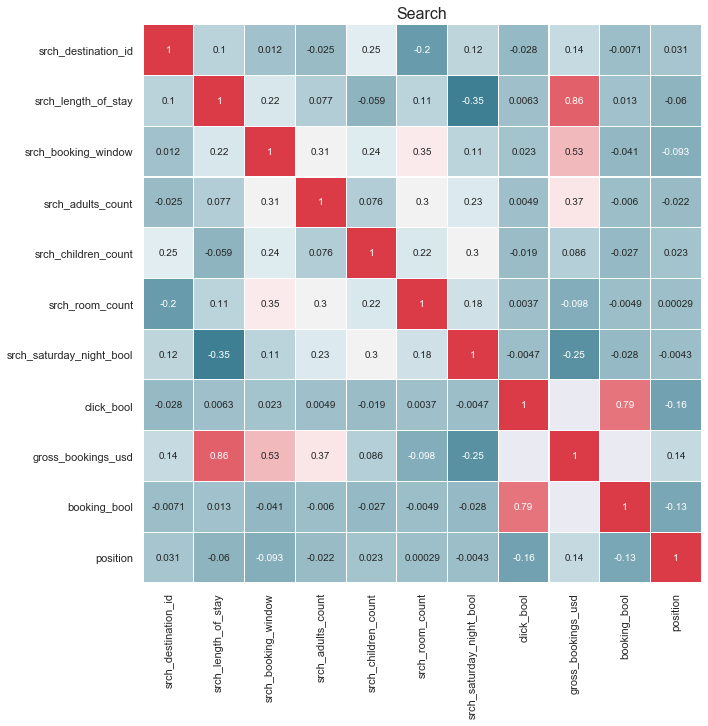

<Figure size 864x576 with 0 Axes>

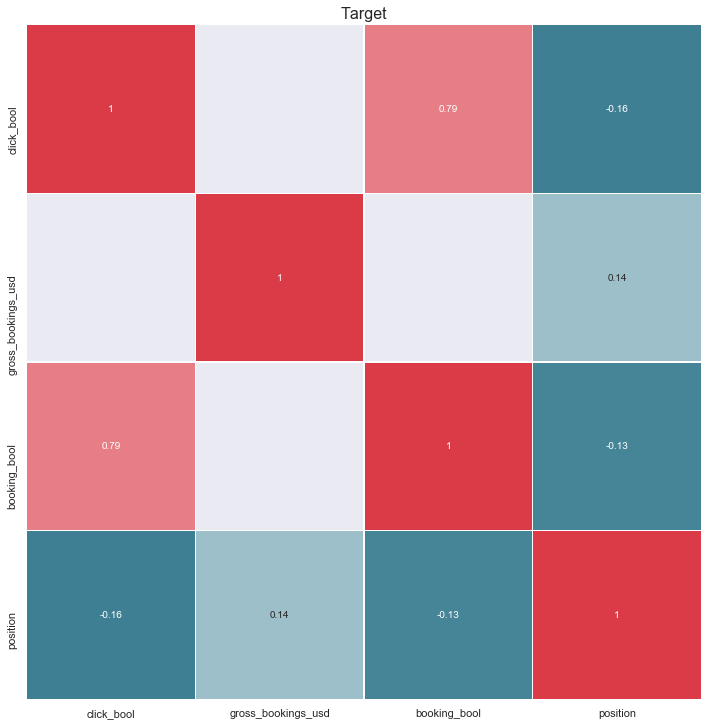

In [5]:
# Groups of attributes
visitor = list(range(3,6))
prop = list(range(6,17))
prop.remove(14)
srch = list(range(17,24))
target = list(range(51,54))
target.append(14)

correlation_heatmap(train.iloc[:,visitor+target])
plt.title('Visitor',fontdict = {'fontsize' : 16})

correlation_heatmap(train.iloc[:,prop+target])
plt.title('Property',fontdict = {'fontsize' : 16})

correlation_heatmap(train.iloc[:,srch+target])
plt.title('Search',fontdict = {'fontsize' : 16})

correlation_heatmap(train.iloc[:,target])
plt.title('Target',fontdict = {'fontsize' : 16})

In [6]:
print(train['click_bool'].value_counts())
print(train['booking_bool'].value_counts())

0    957
1     43
Name: click_bool, dtype: int64
0    973
1     27
Name: booking_bool, dtype: int64


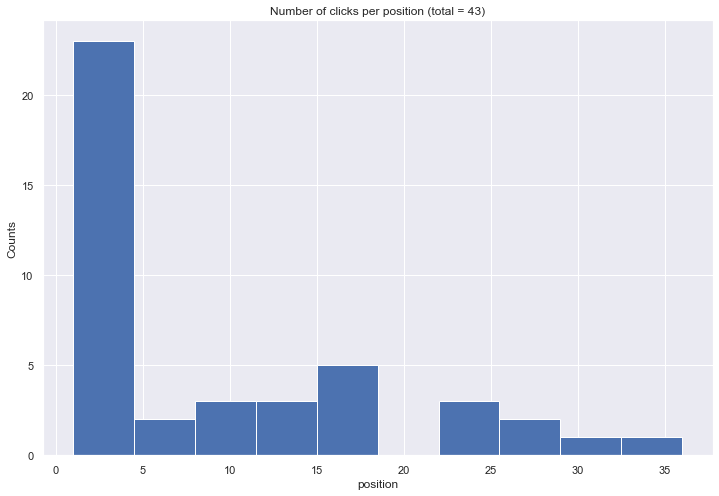

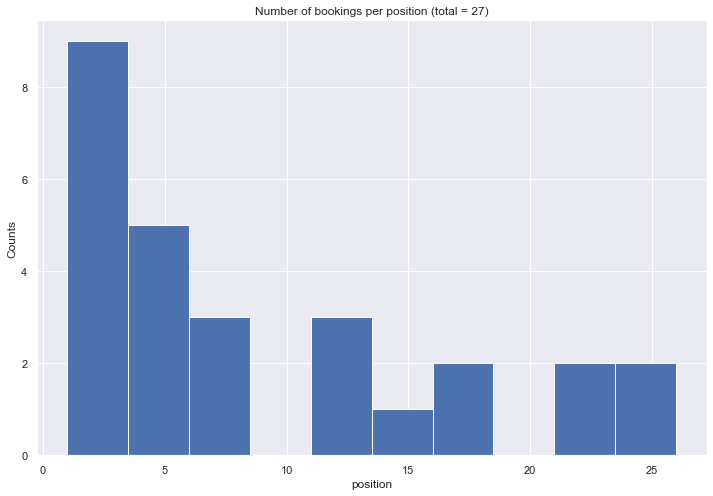

In [7]:
train.loc[train['click_bool'] == 1, 'position'].value_counts()
train.loc[train['click_bool'] == 1, 'position'].hist()
plt.ylabel('Counts'), plt.xlabel('position')
plt.title('Number of clicks per position (total = 43)')
plt.show()

train.loc[train['booking_bool'] == 1, 'position'].value_counts()
train.loc[train['booking_bool'] == 1, 'position'].hist()
plt.ylabel('Counts'), plt.xlabel('position')
plt.title('Number of bookings per position (total = 27)')
plt.show()